#Paquetes necesarios

In [37]:
import cv2  
import math 
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import easyocr

Reconocimiento decaracteres tras instalar easyocr

Confidence ---> 0.85
Class name --> plate


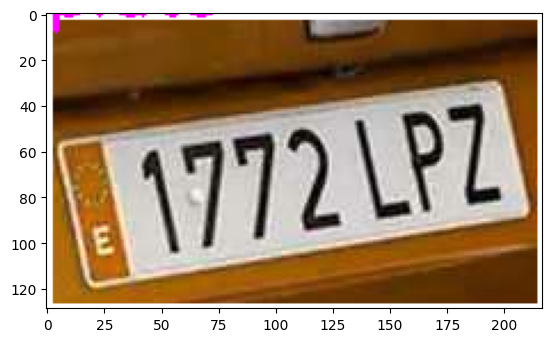

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
0: 384x640 1 license-plate, 352.8ms
Speed: 13.0ms preprocess, 352.8ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


La matrícula detectada es: 1772 LPZ


In [95]:
model = YOLO('Matriculas_ESP.v1i.yolov8/runs/best.pt')

nc: 1

names=["plate"]
classNames=["plate"]
img_path='coche3.jpg'
img = cv2.imread(img_path)


results = model(img, stream=True)
       
# Para cada detección
for r in results:
    boxes = r.boxes
    for box in boxes:
        # Contenedor
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values
        x, y, w, h = box.xywh[0]
        x, y, w, h = int(x), int(y), int(w), int(h) # convert to int values
        
        # Confianza
        confidence = math.ceil((box.conf[0]*100))/100
        print("Confidence --->",confidence)

        # Clase
        cls = int(box.cls[0])
        print("Class name -->", classNames[0])

        # Convierte identificador numérico de clase a un color RGB
        escala = int((cls / len(classNames)) * 255 * 3)
        if escala >= 255*2:
            R = 255
            G = 255
            B = escala - 255*2
        else:
            if escala >= 255:
                R = 255
                G = escala - 255
                B = 0
            else:
                R = escala
                G = 0
                B = 0

        # Dibuja el contenedor y clase
        cv2.rectangle(img, (x1, y1), (x2, y2), (R, G, B), 3)
        cv2.putText(img, classNames[0] , [x1, y1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, B), 2)
        img_cropped=img[y1:y2, x1:x2]
       
        plt.imshow(img_cropped) 
        plt.show()
        #Carga del modelo de lengua
        reader = easyocr.Reader(['es']) 

#Reconocimiento de una imagen
#result = reader.readtext('runs/detect/predict2/coche2.png')
        result = reader.readtext(img_cropped, allowlist ='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
        first=result[0][1]
        second=result[1][1]
        if first.isnumeric():
            output=first + " " +second
        else:
            output=second+ " " +first
        print("La matrícula detectada es:",output)



In [ ]:
imagen = 'runs/predict3/coche3.jpg'
cropped = img[]